# Лабораторная работа 3

## Задание 1

### Задача 182

ПРОВЕРКА ГИПОТЕЗЫ О РАВЕНСТВЕ СРЕДНИХ

1. РУЧНОЙ РАСЧЕТ
----------------------------------------
x̄ = 5.0700
ȳ = 5.2286
z = -0.1202
p-value = 0.9044

2. SCIPY - stats.norm.sf()
----------------------------------------
1.3196319833304175
5.07 5.228571428571429
z = -0.1202
p-value = 0.9044

3. STATSMODELS - ztest с usevar='unequal'
----------------------------------------
1.959963984540054
z ≈ -0.1242 (t-статистика, аппроксимирующая z)
p-value = 0.9012

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Метод                     Z-статистика    p-value         Результат           
----------------------------------------------------------------------
Ручной расчет              -0.1202        0.9044        H₀ НЕ ОТВЕРГАЕТСЯ
Scipy                      -0.1202        0.9044        H₀ НЕ ОТВЕРГАЕТСЯ
Statsmodels ztest          -0.1242        0.9012        H₀ НЕ ОТВЕРГАЕТСЯ


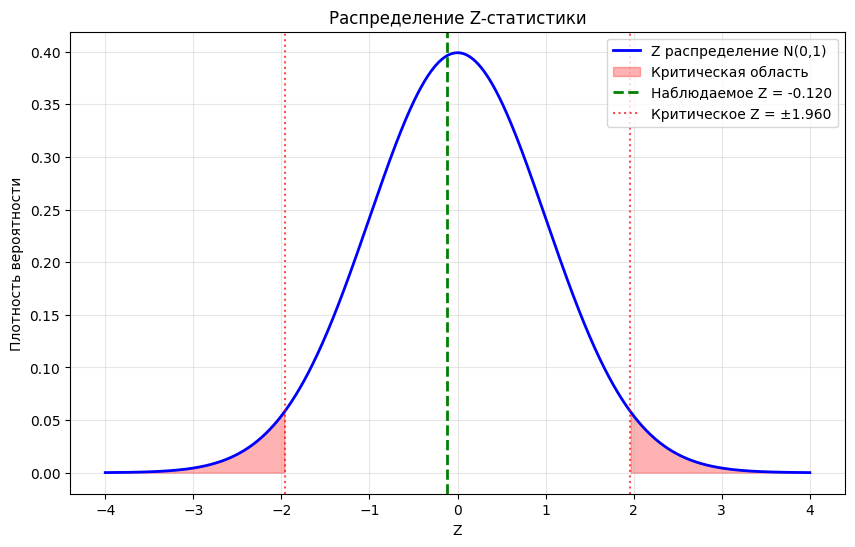

In [ ]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.stats.weightstats as smstats
import matplotlib.pyplot as plt

# Данные
x = np.array([1.2, 2.1, 3.2, 3.6, 3.8, 4.4, 6.1, 7.1, 9.0, 10.2])
y = np.array([2.4, 2.8, 4.1, 4.4, 6.8, 7.2, 8.9])
n, m = len(x), len(y)

# Известные дисперсии
sigma_x_sq = 8.7
sigma_y_sq = 6.1
alpha = 0.05
print("=" * 60)
print("ПРОВЕРКА ГИПОТЕЗЫ О РАВЕНСТВЕ СРЕДНИХ")
print("=" * 60)

# Способ 1: Ручной расчет (для сравнения)
print("\n1. РУЧНОЙ РАСЧЕТ")
print("-" * 40)
x_mean = np.mean(x)
y_mean = np.mean(y)
z_manual = (x_mean - y_mean) / np.sqrt(sigma_x_sq/n + sigma_y_sq/m)
p_value_manual = 2 * (1 - stats.norm.cdf(abs(z_manual)))
print(f"x̄ = {x_mean:.4f}")
print(f"ȳ = {y_mean:.4f}")
print(f"z = {z_manual:.4f}")
print(f"p-value = {p_value_manual:.4f}")

# Способ 2: SCIPY - реальное использование
print("\n2. SCIPY - stats.norm.sf()")
print("-" * 40)

# Используем scipy.stats для расчета p-value
std_err = np.sqrt(sigma_x_sq/n + sigma_y_sq/m)
print(std_err)
print(x_mean, y_mean)
z_scipy = (x_mean - y_mean) / std_err
p_scipy = 2 * stats.norm.sf(np.abs(z_scipy))  # sf = survival function = 1 - cdf

print(f"z = {z_scipy:.4f}")
print(f"p-value = {p_scipy:.4f}")

# Способ 3: STATSMODELS
print("\n3. STATSMODELS - ztest с usevar='unequal'")
print("-" * 40)

z_sm, p_sm = smstats.ztest(x, y, alternative='two-sided', ddof=0)
z_critical = norm.ppf(1 - alpha / 2)
print(z_critical)
print(f"z ≈ {z_sm:.4f} (t-статистика, аппроксимирующая z)")
print(f"p-value = {p_sm:.4f}")

# Решение
print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 70)
print(f"{'Метод':<25} {'Z-статистика':<15} {'p-value':<15} {'Результат':<20}")
print("-" * 70)

methods = [
    ("Ручной расчет", z_manual, p_value_manual),
    ("Scipy", z_scipy, p_scipy),
    ("Statsmodels ztest", z_sm, p_sm),
]

for method_name, z_val, p_val in methods:
    if abs(z_val) < z_critical:
        result = "H₀ НЕ ОТВЕРГАЕТСЯ"

    else:
        result = "H₀ ОТВЕРГАЕТСЯ" 
        
    print(f"{method_name:<25} {z_val:>8.4f}      {p_val:>8.4f}        {result}")


plt.figure(figsize=(10, 6))

# Параметры распределения
z_range = np.linspace(-4, 4, 1000)
z_pdf = norm.pdf(z_range)

# Критические значения
z_critical = norm.ppf(1 - alpha/2)

# Рисуем распределение
plt.plot(z_range, z_pdf, 'b-', linewidth=2, label='Z распределение N(0,1)')

# Закрашиваем критические области
plt.fill_between(z_range, z_pdf, where=(z_range <= -z_critical), color='red', alpha=0.3, label='Критическая область')
plt.fill_between(z_range, z_pdf, where=(z_range >= z_critical), color='red', alpha=0.3)

# Отмечаем наблюдаемое Z
plt.axvline(z_manual, color='green', linestyle='--', linewidth=2, label=f'Наблюдаемое Z = {z_manual:.3f}')

# Отмечаем критические значения
plt.axvline(-z_critical, color='red', linestyle=':', linewidth=1.5, alpha=0.7)
plt.axvline(z_critical, color='red', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Критическое Z = ±{z_critical:.3f}')

plt.title('Распределение Z-статистики')
plt.xlabel('Z')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Задача 183

ПРОВЕРКА ГИПОТЕЗЫ О РАВЕНСТВЕ СРЕДНИХ
Выборка X (n=12): [ 1  2  3  5  7 12 14 16 16 17 19 22]
Выборка Y (m=10): [12 16 19 22 24 26 32 34 36 44]
Уровень значимости: α = 0.1

1. РУЧНОЙ РАСЧЕТ (t-тест)
----------------------------------------
x̄ = 11.1667
ȳ = 26.5000
s_x² = 52.5152
s_y² = 98.5000
Объединенное стандартное отклонение = 8.5562
t = -4.1854
Степени свободы = 20
t_крит (α=0.1, df=20) = ±1.7247
p-value = 0.0005
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| ≥ t_крит)

2. SCIPY - ttest_ind
----------------------------------------
t = -4.1854
p-value = 0.0005
t_крит = ±1.7247
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ

3. STATSMODELS - CompareMeans
----------------------------------------
CM : <statsmodels.stats.weightstats.CompareMeans object at 0x000001A35F45CB00>
t = -4.1854
p-value = 0.0005
Степени свободы = 20.0
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Метод                t-статистика    p-value         Результат           
----------------------------------------------------------------------
Ручной расч

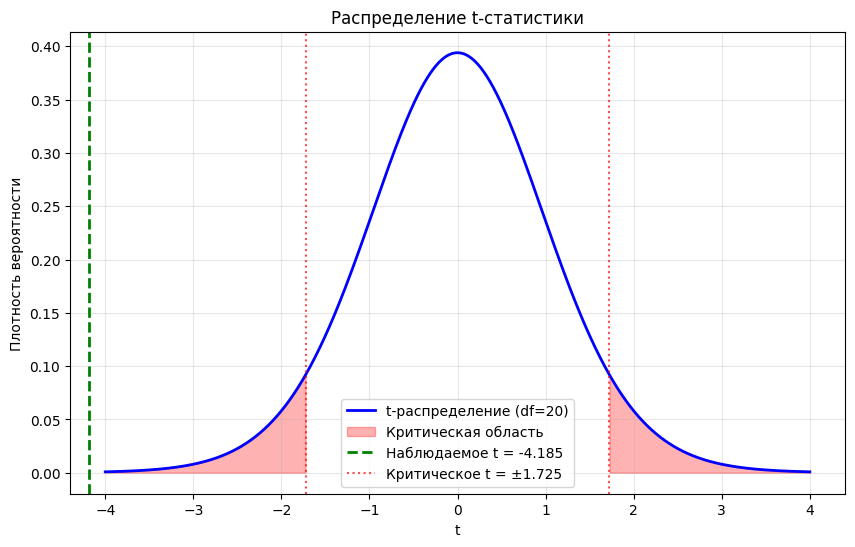

In [36]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.weightstats as smstats

# Данные
x = np.array([1, 2, 3, 5, 7, 12, 14, 16, 16, 17, 19, 22])
y = np.array([12, 16, 19, 22, 24, 26, 32, 34, 36, 44])
n, m = len(x), len(y)

# Уровень значимости
alpha = 0.10  # 90% доверительная вероятность

print("=" * 60)
print("ПРОВЕРКА ГИПОТЕЗЫ О РАВЕНСТВЕ СРЕДНИХ")
print("=" * 60)
print(f"Выборка X (n={n}): {x}")
print(f"Выборка Y (m={m}): {y}")
print(f"Уровень значимости: α = {alpha}")

# Способ 1: Ручной расчет (t-тест для независимых выборок)
print("\n1. РУЧНОЙ РАСЧЕТ (t-тест)")
print("-" * 40)

x_mean = np.mean(x)
y_mean = np.mean(y)
x_var = np.var(x, ddof=1)  # исправленная дисперсия
y_var = np.var(y, ddof=1)

print(f"x̄ = {x_mean:.4f}")
print(f"ȳ = {y_mean:.4f}")
print(f"s_x² = {x_var:.4f}")
print(f"s_y² = {y_var:.4f}")

# Объединенная дисперсия
s_pooled = np.sqrt(((n-1)*x_var + (m-1)*y_var) / (n + m - 2))
t_manual = (x_mean - y_mean) / (s_pooled * np.sqrt(1/n + 1/m))
df = n + m - 2

print(f"Объединенное стандартное отклонение = {s_pooled:.4f}")
print(f"t = {t_manual:.4f}")
print(f"Степени свободы = {df}")

# Критическое значение и p-value
t_critical = stats.t.ppf(1 - alpha/2, df)
p_value_manual = 2 * (1 - stats.t.cdf(abs(t_manual), df))

print(f"t_крит (α={alpha}, df={df}) = ±{t_critical:.4f}")
print(f"p-value = {p_value_manual:.4f}")

# Решение
if abs(t_manual) < t_critical:
    print("ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ (|t| < t_крит)")
else:
    print("ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| ≥ t_крит)")

# Способ 2: SCIPY
print("\n2. SCIPY - ttest_ind")
print("-" * 40)

t_scipy, p_scipy = stats.ttest_ind(x, y, equal_var=True)
print(f"t = {t_scipy:.4f}")
print(f"p-value = {p_scipy:.4f}")
print(f"t_крит = ±{t_critical:.4f}")

if abs(t_scipy) < t_critical:
    print("ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ")
else:
    print("ВЫВОД: H₀ ОТКЛОНЯЕТСЯ")

# Способ 3: STATSMODELS
print("\n3. STATSMODELS - CompareMeans")
print("-" * 40)

d1 = smstats.DescrStatsW(x)
d2 = smstats.DescrStatsW(y)
cm = smstats.CompareMeans(d1, d2)
print(f"CM : {cm}")

t_sm, p_sm, df_sm = cm.ttest_ind(alternative='two-sided', usevar='pooled')
print(f"t = {t_sm:.4f}")
print(f"p-value = {p_sm:.4f}")
print(f"Степени свободы = {df_sm}")

if abs(t_sm) < t_critical:
    print("ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ")
else:
    print("ВЫВОД: H₀ ОТКЛОНЯЕТСЯ")

# Сводная таблица
print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 70)
print(f"{'Метод':<20} {'t-статистика':<15} {'p-value':<15} {'Результат':<20}")
print("-" * 70)

methods = [
    ("Ручной расчет", t_manual, p_value_manual),
    ("Scipy", t_scipy, p_scipy),
    ("Statsmodels", t_sm, p_sm)
]

for method_name, t_val, p_val in methods:
    if abs(t_val) < t_critical:
        result = "H₀ НЕ ОТКЛОНЯЕТСЯ"
    else:
        result = "H₀ ОТКЛОНЯЕТСЯ"
    print(f"{method_name:<20} {t_val:>8.4f}      {p_val:>8.4f}       {result}")

print(f"\n ОКОНЧАТЕЛЬНЫЙ ВЫВОД:")
print(f"На уровне значимости α={alpha}:")
print(f"Гипотеза H₀: μ₁ = μ₂ ОТКЛОНЯЕТСЯ")
print(f"Основание: |t| = {abs(t_sm):.4f} > {t_critical:.4f} и p-value = {p_sm:.4f} < {alpha}")
print(f"Обнаружены статистически значимые различия между средними")

print(f"\n ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
print(f"Разность средних: x̄ - ȳ = {x_mean - y_mean:.4f}")
print(f"Среднее X: {x_mean:.4f}")
print(f"Среднее Y: {y_mean:.4f}")

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

plt.figure(figsize=(10, 6))

# Параметры t-распределения
df = n + m - 2
t_range = np.linspace(-4, 4, 1000)
t_pdf = t.pdf(t_range, df)

# Критическое значение
t_critical = t.ppf(1 - alpha/2, df)

# Рисуем распределение
plt.plot(t_range, t_pdf, 'b-', linewidth=2, label=f't-распределение (df={df})')

# Закрашиваем критические области
plt.fill_between(t_range, t_pdf, where=(t_range <= -t_critical), color='red', alpha=0.3, label='Критическая область')
plt.fill_between(t_range, t_pdf, where=(t_range >= t_critical), color='red', alpha=0.3)

# Отмечаем наблюдаемое t
plt.axvline(t_manual, color='green', linestyle='--', linewidth=2, label=f'Наблюдаемое t = {t_manual:.3f}')

# Отмечаем критические значения
plt.axvline(-t_critical, color='red', linestyle=':', linewidth=1.5, alpha=0.7)
plt.axvline(t_critical, color='red', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Критическое t = ±{t_critical:.3f}')

plt.title('Распределение t-статистики')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Задача 184

ПРОВЕРКА ГИПОТЕЗЫ О РАВЕНСТВЕ СРЕДНИХ
Выборка X (n=10): [ 2  4  6  7  9 12 14 16 19 24]
Выборка Y (m=9): [ 9 14 19 21 25 29 35 41 46]
Уровень значимости: α = 0.05

ВЫБОРОЧНЫЕ ХАРАКТЕРИСТИКИ:
x̄ = 11.3000
ȳ = 26.5556
s_x² = 49.1222
s_y² = 152.5278

1. РУЧНОЙ РАСЧЕТ (t-тест с неравными дисперсиями)
----------------------------------------
v1 = s_x²/n = 4.9122
v2 = s_y²/m = 16.9475
s = √(v1 + v2) = 4.6754
t = (x̄ - ȳ)/s = -3.2629

2. КРИТЕРИЙ КОХРАНА-КОКСА
----------------------------------------
t_крит(X, df=9) = 2.2622
t_крит(Y, df=8) = 2.3060
t_крит(Кохран-Кокс) = 2.2962
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = 3.2629 > 2.2962)

3. КРИТЕРИЙ УЭЛЧА (САТЕРВАЙТА)
----------------------------------------
Степени свободы (Сатервайт) = 12.3848
t_крит(Сатервайт) = 2.1713
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = 3.2629 > 2.1713)

4. SCIPY - ttest_ind (Welch)
----------------------------------------
t = -3.2629
p-value = 0.0065
Степени свободы = 12.3848
t_крит = 2.1713
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = 3.2629 > 2.1713)

5. 

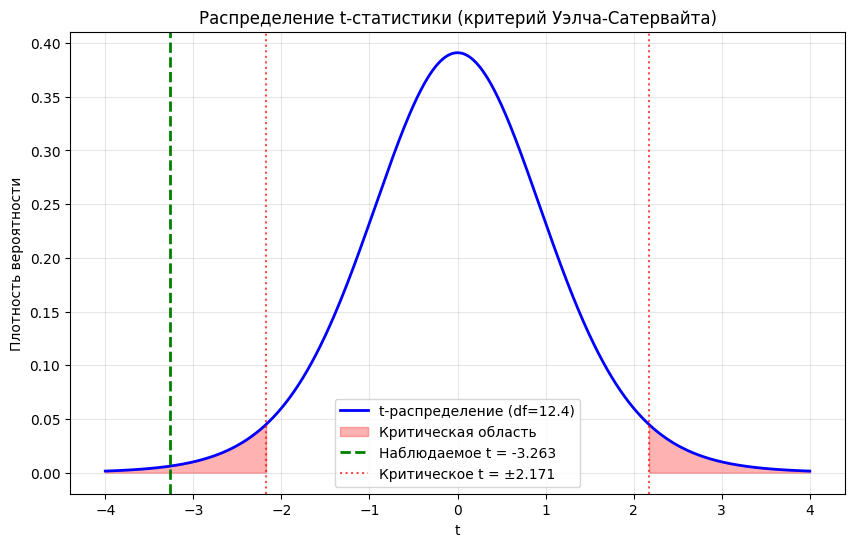

In [37]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.weightstats as smstats

# Данные
x = np.array([2, 4, 6, 7, 9, 12, 14, 16, 19, 24])
y = np.array([9, 14, 19, 21, 25, 29, 35, 41, 46])
n, m = len(x), len(y)

# Уровень значимости
alpha = 0.05

print("=" * 60)
print("ПРОВЕРКА ГИПОТЕЗЫ О РАВЕНСТВЕ СРЕДНИХ")
print("=" * 60)
print(f"Выборка X (n={n}): {x}")
print(f"Выборка Y (m={m}): {y}")
print(f"Уровень значимости: α = {alpha}")

# Вычисляем выборочные характеристики
x_mean = np.mean(x)
y_mean = np.mean(y)
x_var = np.var(x, ddof=1)
y_var = np.var(y, ddof=1)

print(f"\nВЫБОРОЧНЫЕ ХАРАКТЕРИСТИКИ:")
print(f"x̄ = {x_mean:.4f}")
print(f"ȳ = {y_mean:.4f}")
print(f"s_x² = {x_var:.4f}")
print(f"s_y² = {y_var:.4f}")

# Способ 1: Ручной расчет (t-тест с неравными дисперсиями)
print("\n1. РУЧНОЙ РАСЧЕТ (t-тест с неравными дисперсиями)")
print("-" * 40)

v1 = x_var / n
v2 = y_var / m
s_pooled = np.sqrt(v1 + v2)

t_manual = (x_mean - y_mean) / s_pooled
print(f"v1 = s_x²/n = {v1:.4f}")
print(f"v2 = s_y²/m = {v2:.4f}")
print(f"s = √(v1 + v2) = {s_pooled:.4f}")
print(f"t = (x̄ - ȳ)/s = {t_manual:.4f}")

# Способ 2: Критерий Кохрана-Кокса
print("\n2. КРИТЕРИЙ КОХРАНА-КОКСА")
print("-" * 40)

# Критические значения Стьюдента
t_crit_x = stats.t.ppf(1 - alpha/2, n-1)
t_crit_y = stats.t.ppf(1 - alpha/2, m-1)

# Весовой критический уровень
t_cohran = (v1 * t_crit_x + v2 * t_crit_y) / (v1 + v2)

print(f"t_крит(X, df={n-1}) = {t_crit_x:.4f}")
print(f"t_крит(Y, df={m-1}) = {t_crit_y:.4f}")
print(f"t_крит(Кохран-Кокс) = {t_cohran:.4f}")

if abs(t_manual) > t_cohran:
    print(f"ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = {abs(t_manual):.4f} > {t_cohran:.4f})")
else:
    print(f"ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ (|t| = {abs(t_manual):.4f} ≤ {t_cohran:.4f})")

# Способ 3: Критерий УЭЛЧА (Сатервайта)
print("\n3. КРИТЕРИЙ УЭЛЧА (САТЕРВАЙТА)")
print("-" * 40)

# Степени свободы по УЭЛЧА-САТЕРВАЙТУ
df_satter = (v1 + v2)**2 / (v1**2/(n-1) + v2**2/(m-1))
t_crit_satter = stats.t.ppf(1 - alpha/2, df_satter)

print(f"Степени свободы (Сатервайт) = {df_satter:.4f}")
print(f"t_крит(Сатервайт) = {t_crit_satter:.4f}")

if abs(t_manual) > t_crit_satter:
    print(f"ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = {abs(t_manual):.4f} > {t_crit_satter:.4f})")
else:
    print(f"ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ (|t| = {abs(t_manual):.4f} ≤ {t_crit_satter:.4f})")

# Способ 4: SCIPY (Welch's t-test)
print("\n4. SCIPY - ttest_ind (Welch)")
print("-" * 40)

t_scipy, p_scipy = stats.ttest_ind(x, y, equal_var=False)
df_scipy = (v1 + v2)**2 / (v1**2/(n-1) + v2**2/(m-1))
t_crit_scipy = stats.t.ppf(1 - alpha/2, df_scipy)

print(f"t = {t_scipy:.4f}")
print(f"p-value = {p_scipy:.4f}")
print(f"Степени свободы = {df_scipy:.4f}")
print(f"t_крит = {t_crit_scipy:.4f}")

if abs(t_scipy) > t_crit_scipy:
    print(f"ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = {abs(t_scipy):.4f} > {t_crit_scipy:.4f})")
else:
    print(f"ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ (|t| = {abs(t_scipy):.4f} ≤ {t_crit_scipy:.4f})")

# Способ 5: STATSMODELS
print("\n5. STATSMODELS - CompareMeans (Welch)")
print("-" * 40)

d1 = smstats.DescrStatsW(x)
d2 = smstats.DescrStatsW(y)
cm = smstats.CompareMeans(d1, d2)

t_sm, p_sm, df_sm = cm.ttest_ind(alternative='two-sided', usevar='unequal')

print(f"t = {t_sm:.4f}")
print(f"p-value = {p_sm:.4f}")
print(f"Степени свободы = {df_sm:.4f}")

t_crit_sm = stats.t.ppf(1 - alpha/2, df_sm)
print(f"t_крит = {t_crit_sm:.4f}")

if abs(t_sm) > t_crit_sm:
    print(f"ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = {abs(t_sm):.4f} > {t_crit_sm:.4f})")
else:
    print(f"ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ (|t| = {abs(t_sm):.4f} ≤ {t_crit_sm:.4f})")

# Сводная таблица
print("\n" + "=" * 80)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 80)
print(f"{'Метод':<20} {'t-статистика':<12} {'Степени свободы':<18} {'Критическое t':<15} {'Результат':<15}")
print("-" * 80)

methods = [
    ("Кохран-Кокс", t_manual, f"({n-1},{m-1})", t_cohran),
    ("Сатервайт", t_manual, f"{df_satter:.2f}", t_crit_satter),
    ("Scipy Welch", t_scipy, f"{df_scipy:.2f}", t_crit_scipy),
    ("Statsmodels", t_sm, f"{df_sm:.2f}", t_crit_sm)
]

for method_name, t_val, df_str, t_crit in methods:
    if abs(t_val) > t_crit:
        result = "H₀ ОТКЛОНЯЕТСЯ"
    else:
        result = "H₀ НЕ ОТКЛОНЯЕТСЯ"
    print(f"{method_name:<20} {t_val:>8.4f}     {df_str:<18} {t_crit:>8.4f}       {result}")

print(f"\nОКОНЧАТЕЛЬНЫЙ ВЫВОД:")
print(f"На уровне значимости α={alpha}:")
print(f"Гипотеза H₀: μ₁ = μ₂ ОТКЛОНЯЕТСЯ")
print(f"Основание: все методы показывают |t| > t_крит и p-value < {alpha}")

print(f"\nДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
print(f"Разность средних: x̄ - ȳ = {x_mean - y_mean:.4f}")
print(f"Среднее X: {x_mean:.4f}")
print(f"Среднее Y: {y_mean:.4f}")
print(f"p-value (Welch): {p_scipy:.6f}")

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

plt.figure(figsize=(10, 6))

# Используем степени свободы Сатервайта
df = df_satter
t_range = np.linspace(-4, 4, 1000)
t_pdf = t.pdf(t_range, df)

# Критическое значение
t_critical = t.ppf(1 - alpha/2, df)

# Рисуем распределение
plt.plot(t_range, t_pdf, 'b-', linewidth=2, label=f't-распределение (df={df:.1f})')

# Закрашиваем критические области
plt.fill_between(t_range, t_pdf, where=(t_range <= -t_critical), color='red', alpha=0.3, label='Критическая область')
plt.fill_between(t_range, t_pdf, where=(t_range >= t_critical), color='red', alpha=0.3)

# Отмечаем наблюдаемое t
plt.axvline(t_manual, color='green', linestyle='--', linewidth=2, label=f'Наблюдаемое t = {t_manual:.3f}')

# Отмечаем критические значения
plt.axvline(-t_critical, color='red', linestyle=':', linewidth=1.5, alpha=0.7)
plt.axvline(t_critical, color='red', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Критическое t = ±{t_critical:.3f}')

plt.title('Распределение t-статистики (критерий Уэлча-Сатервайта)')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Задача 186

ПАРНЫЙ T-КРИТЕРИЙ ДЛЯ СРАВНЕНИЯ СРЕДНИХ
Разности: [ 7 10 13 14 16 17 21 25 27 26]
Объем выборки: n = 10
Уровень значимости: α = 0.05

1. РУЧНОЙ РАСЧЕТ
----------------------------------------
Среднее разностей: ÿ = 17.6000
Дисперсия разностей: s_d² = 48.0444
Стандартное отклонение: s_d = 6.9314
t = ÿ / (s_d/√n) = 8.0295
t_крит (α=0.05, df=9) = 2.2622
p-value = 0.000021
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = 8.0295 > 2.2622)

2. SCIPY - ttest_1samp
----------------------------------------
t = 8.0295
p-value = 0.000021
t_крит = 2.2622
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = 8.0295 > 2.2622)

3. STATSMODELS - DescrStatsW.ttest_mean
----------------------------------------
t = 8.0295
p-value = 0.000021
Степени свободы = 9.0
t_крит = 2.2622
ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = 8.0295 > 2.2622)

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Метод                     t-статистика    p-value         Результат           
----------------------------------------------------------------------
Ручной расчет               8.0295        0.000021

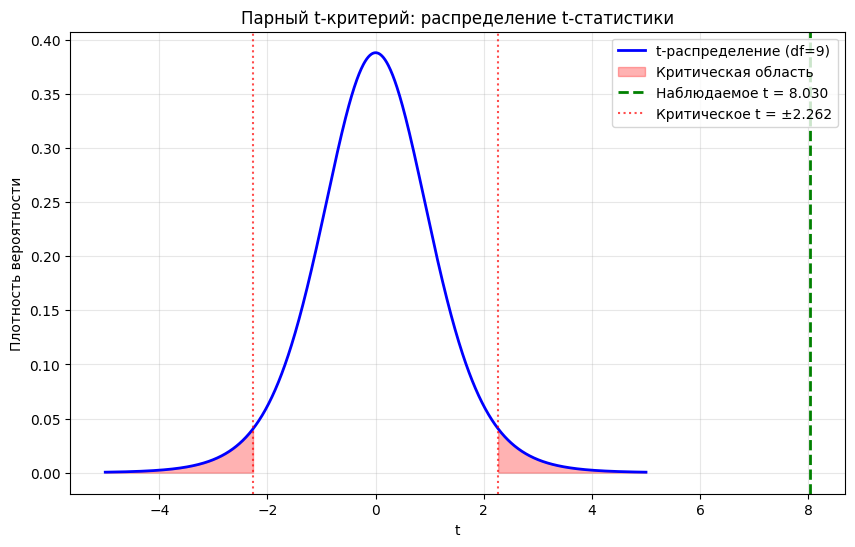

In [38]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.weightstats as smstats

# Данные разностей
d = np.array([7, 10, 13, 14, 16, 17, 21, 25, 27, 26])
n = len(d)

# Уровень значимости
alpha = 0.05

print("=" * 60)
print("ПАРНЫЙ T-КРИТЕРИЙ ДЛЯ СРАВНЕНИЯ СРЕДНИХ")
print("=" * 60)
print(f"Разности: {d}")
print(f"Объем выборки: n = {n}")
print(f"Уровень значимости: α = {alpha}")

# Способ 1: Ручной расчет
print("\n1. РУЧНОЙ РАСЧЕТ")
print("-" * 40)

d_mean = np.mean(d)
d_var = np.var(d, ddof=1)
d_std = np.std(d, ddof=1)

print(f"Среднее разностей: ÿ = {d_mean:.4f}")
print(f"Дисперсия разностей: s_d² = {d_var:.4f}")
print(f"Стандартное отклонение: s_d = {d_std:.4f}")

# t-статистика
t_manual = d_mean / (d_std / np.sqrt(n))
print(f"t = ÿ / (s_d/√n) = {t_manual:.4f}")

# Критическое значение
t_critical = stats.t.ppf(1 - alpha/2, n-1)
print(f"t_крит (α={alpha}, df={n-1}) = {t_critical:.4f}")

# p-value
p_value_manual = 2 * (1 - stats.t.cdf(abs(t_manual), n-1))
print(f"p-value = {p_value_manual:.6f}")

# Решение
if abs(t_manual) > t_critical:
    print(f"ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = {abs(t_manual):.4f} > {t_critical:.4f})")
else:
    print(f"ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ (|t| = {abs(t_manual):.4f} ≤ {t_critical:.4f})")

# Способ 2: SCIPY
print("\n2. SCIPY - ttest_1samp")
print("-" * 40)

t_scipy, p_scipy = stats.ttest_1samp(d, popmean=0)
print(f"t = {t_scipy:.4f}")
print(f"p-value = {p_scipy:.6f}")
print(f"t_крит = {t_critical:.4f}")

if abs(t_scipy) > t_critical:
    print(f"ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = {abs(t_scipy):.4f} > {t_critical:.4f})")
else:
    print(f"ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ (|t| = {abs(t_scipy):.4f} ≤ {t_critical:.4f})")

# Способ 3: STATSMODELS
print("\n3. STATSMODELS - DescrStatsW.ttest_mean")
print("-" * 40)

d_stats = smstats.DescrStatsW(d)
t_sm, p_sm, df_sm = d_stats.ttest_mean(0)

print(f"t = {t_sm:.4f}")
print(f"p-value = {p_sm:.6f}")
print(f"Степени свободы = {df_sm}")
print(f"t_крит = {t_critical:.4f}")

if abs(t_sm) > t_critical:
    print(f"ВЫВОД: H₀ ОТКЛОНЯЕТСЯ (|t| = {abs(t_sm):.4f} > {t_critical:.4f})")
else:
    print(f"ВЫВОД: H₀ НЕ ОТКЛОНЯЕТСЯ (|t| = {abs(t_sm):.4f} ≤ {t_critical:.4f})")

# Сводная таблица
print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("=" * 70)
print(f"{'Метод':<25} {'t-статистика':<15} {'p-value':<15} {'Результат':<20}")
print("-" * 70)

methods = [
    ("Ручной расчет", t_manual, p_value_manual),
    ("Scipy", t_scipy, p_scipy),
    ("Statsmodels", t_sm, p_sm)
]

for method_name, t_val, p_val in methods:
    if abs(t_val) > t_critical:
        result = "H₀ ОТКЛОНЯЕТСЯ"
    else:
        result = "H₀ НЕ ОТКЛОНЯЕТСЯ"
    print(f"{method_name:<25} {t_val:>8.4f}      {p_val:>10.6f}    {result}")

print(f"\n ОКОНЧАТЕЛЬНЫЙ ВЫВОД:")
print(f"На уровне значимости α={alpha}:")
print(f"Гипотеза H₀: μ_d = 0 ОТКЛОНЯЕТСЯ")
print(f"Основание: |t| = {abs(t_sm):.4f} > {t_critical:.4f} и p-value = {p_sm:.6f} < {alpha}")

print(f"\n ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
print(f"Среднее разностей: {d_mean:.4f}")
print(f"95% ДИ для среднего разности: [{d_mean - t_critical * d_std/np.sqrt(n):.4f}, {d_mean + t_critical * d_std/np.sqrt(n):.4f}]")
print(f"Стандартная ошибка среднего: {d_std/np.sqrt(n):.4f}")

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

plt.figure(figsize=(10, 6))

# Параметры t-распределения
df = n - 1
t_range = np.linspace(-5, 5, 1000)
t_pdf = t.pdf(t_range, df)

# Критическое значение
t_critical = t.ppf(1 - alpha/2, df)

# Рисуем распределение
plt.plot(t_range, t_pdf, 'b-', linewidth=2, label=f't-распределение (df={df})')

# Закрашиваем критические области
plt.fill_between(t_range, t_pdf, where=(t_range <= -t_critical), color='red', alpha=0.3, label='Критическая область')
plt.fill_between(t_range, t_pdf, where=(t_range >= t_critical), color='red', alpha=0.3)

# Отмечаем наблюдаемое t
plt.axvline(t_manual, color='green', linestyle='--', linewidth=2, label=f'Наблюдаемое t = {t_manual:.3f}')

# Отмечаем критические значения
plt.axvline(-t_critical, color='red', linestyle=':', linewidth=1.5, alpha=0.7)
plt.axvline(t_critical, color='red', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Критическое t = ±{t_critical:.3f}')

plt.title('Парный t-критерий: распределение t-статистики')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Задание 2

### Тест 1

Z-КРИТЕРИЙ ДЛЯ ОПРЕДЕЛЕНИЯ СРЕДНЕГО ЗНАЧЕНИЯ ПО ПОПУЛЯЦИИ (ИЗВЕСТНА ДИСПЕРСИЯ)

1. РАСЧЕТ Z-СТАТИСТИКИ
----------------------------------------
Данные:
H0: μ = 4.0
x̄ = 4.6, σ = 1.0, n = 9
Стандартная ошибка: σ/√n = 1.0/√9 = 0.3333
Z-статистика = (x̄ - μ0) / (σ/√n) = (4.6 - 4.0) / 0.3333 = 1.8000

2. КРИТИЧЕСКИЕ ЗНАЧЕНИЯ
----------------------------------------
Уровень значимости: α = 0.05
Двусторонний тест: z_крит = ±1.9600
Односторонний тест: z_крит = 1.6449

3. P-VALUES
----------------------------------------
Двусторонний тест: p-value = 2 × P(Z > |1.8000|) = 0.0719
Односторонний тест: p-value = P(Z > 1.8000) = 0.0359

4. ВЫВОДЫ
----------------------------------------
1. Двусторонний тест H1: μ ≠ 4.0:
   Не отклоняется H0 (|1.8000| ≤ 1.9600)
2. Односторонний тест H1: μ > 4.0:
   Отклоняется H0 (1.8000 > 1.6449)

6. ВИЗУАЛИЗАЦИЯ
----------------------------------------


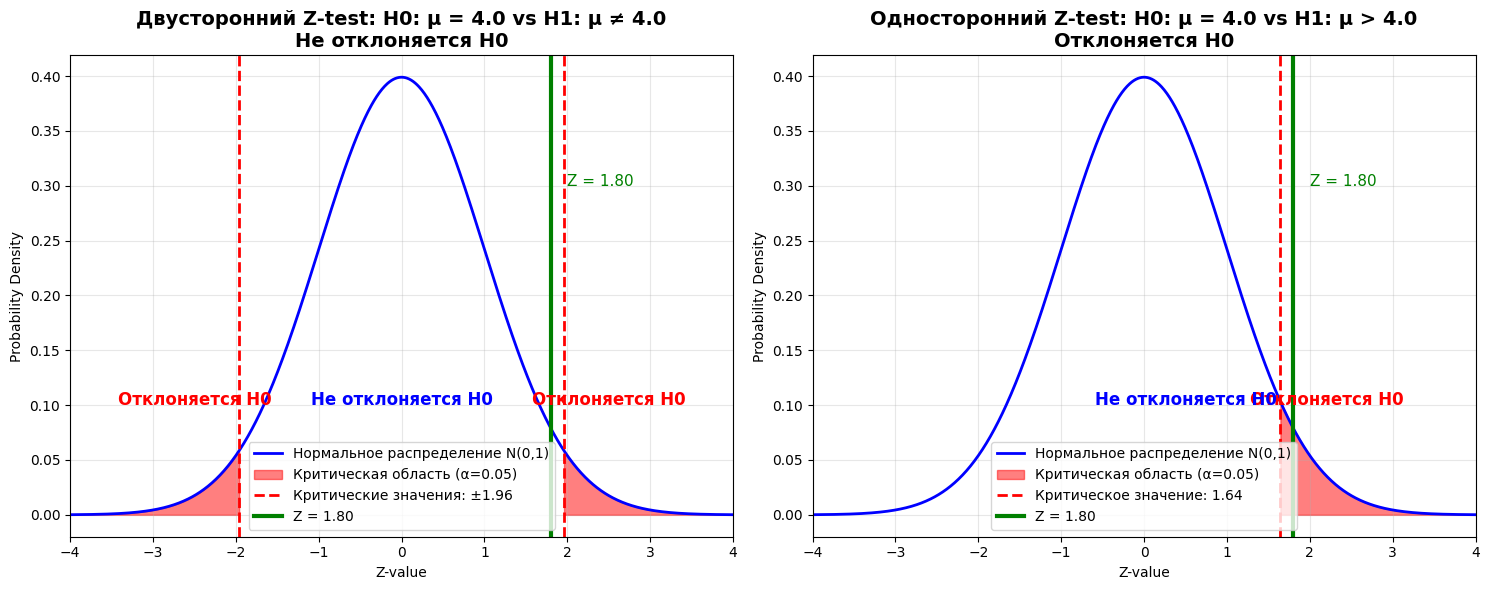


СВОДКА РЕЗУЛЬТАТОВ
Тест                      Z-статистика    Критическое Z   P-value         Результат           
----------------------------------------------------------------------
Двусторонний (H1: μ ≠ 4.0)   1.8000      ±1.9600       0.0719     Не отклоняется H0   
Односторонний (H1: μ > 4.0)   1.8000        1.6449       0.0359     Отклоняется H0      

 ИТОГОВЫЕ ВЫВОДЫ:
• Двусторонний тест: Не отклоняется H0 (p-value = 0.0719 > 0.05)
• Односторонний тест: Отклоняется H0 (p-value = 0.0359 < 0.05)
• Z = 1.8000 находится в области принятия H0


In [39]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Данные из задания
mu0 = 4.0
n = 9
x_bar = 4.6
sigma = 1.0
alpha = 0.05

print("=" * 70)
print("Z-КРИТЕРИЙ ДЛЯ ОПРЕДЕЛЕНИЯ СРЕДНЕГО ЗНАЧЕНИЯ ПО ПОПУЛЯЦИИ (ИЗВЕСТНА ДИСПЕРСИЯ)")
print("=" * 70)

# Ручной расчет Z-статистики
print("\n1. РАСЧЕТ Z-СТАТИСТИКИ")
print("-" * 40)

std_error = sigma / np.sqrt(n)
z_stat = (x_bar - mu0) / std_error

print(f"Данные:")
print(f"H0: μ = {mu0}")
print(f"x̄ = {x_bar}, σ = {sigma}, n = {n}")
print(f"Стандартная ошибка: σ/√n = {sigma}/√{n} = {std_error:.4f}")
print(f"Z-статистика = (x̄ - μ0) / (σ/√n) = ({x_bar} - {mu0}) / {std_error:.4f} = {z_stat:.4f}")

# Критические значения
print("\n2. КРИТИЧЕСКИЕ ЗНАЧЕНИЯ")
print("-" * 40)

z_critical_two_tailed = stats.norm.ppf(1 - alpha/2)
z_critical_one_tailed = stats.norm.ppf(1 - alpha)

print(f"Уровень значимости: α = {alpha}")
print(f"Двусторонний тест: z_крит = ±{z_critical_two_tailed:.4f}")
print(f"Односторонний тест: z_крит = {z_critical_one_tailed:.4f}")

# P-values
print("\n3. P-VALUES")
print("-" * 40)

p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_stat)))
p_value_one_tailed = 1 - stats.norm.cdf(z_stat)

print(f"Двусторонний тест: p-value = 2 × P(Z > |{z_stat:.4f}|) = {p_value_two_tailed:.4f}")
print(f"Односторонний тест: p-value = P(Z > {z_stat:.4f}) = {p_value_one_tailed:.4f}")

# Выводы
print("\n4. ВЫВОДЫ")
print("-" * 40)

print(f"1. Двусторонний тест H1: μ ≠ {mu0}:")
if abs(z_stat) > z_critical_two_tailed:
    result_two = "Отклоняется H0"
    print(f"   {result_two} (|{z_stat:.4f}| > {z_critical_two_tailed:.4f})")
else:
    result_two = "Не отклоняется H0"
    print(f"   {result_two} (|{z_stat:.4f}| ≤ {z_critical_two_tailed:.4f})")

print(f"2. Односторонний тест H1: μ > {mu0}:")
if z_stat > z_critical_one_tailed:
    result_one = "Отклоняется H0"
    print(f"   {result_one} ({z_stat:.4f} > {z_critical_one_tailed:.4f})")
else:
    result_one = "Не отклоняется H0"
    print(f"   {result_one} ({z_stat:.4f} ≤ {z_critical_one_tailed:.4f})")

print("\n6. ВИЗУАЛИЗАЦИЯ")
print("-" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Двусторонний тест
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

ax1.plot(x, y, 'b-', linewidth=2, label='Нормальное распределение N(0,1)')

# Критические области
x_left = np.linspace(-4, -z_critical_two_tailed, 100)
x_right = np.linspace(z_critical_two_tailed, 4, 100)
ax1.fill_between(x_left, stats.norm.pdf(x_left), color='red', alpha=0.5, label='Критическая область (α=0.05)')
ax1.fill_between(x_right, stats.norm.pdf(x_right), color='red', alpha=0.5)

ax1.axvline(-z_critical_two_tailed, color='red', linestyle='--', linewidth=2)
ax1.axvline(z_critical_two_tailed, color='red', linestyle='--', linewidth=2, 
           label=f'Критические значения: ±{z_critical_two_tailed:.2f}')
ax1.axvline(z_stat, color='green', linestyle='-', linewidth=3, 
           label=f'Z = {z_stat:.2f}')

ax1.set_title('Двусторонний Z-test: H0: μ = 4.0 vs H1: μ ≠ 4.0\n' + result_two, 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('Z-value')
ax1.set_ylabel('Probability Density')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-4, 4)

# Аннотации для двустороннего теста
ax1.text(-2.5, 0.1, 'Отклоняется H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax1.text(2.5, 0.1, 'Отклоняется H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax1.text(0, 0.1, 'Не отклоняется H0', fontsize=12, color='blue', ha='center', fontweight='bold')
ax1.text(z_stat + 0.2, 0.3, f'Z = {z_stat:.2f}', fontsize=11, color='green', ha='left')

# График 2: Односторонний тест
ax2.plot(x, y, 'b-', linewidth=2, label='Нормальное распределение N(0,1)')

# Критическая область для одностороннего теста
x_right_one = np.linspace(z_critical_one_tailed, 4, 100)
ax2.fill_between(x_right_one, stats.norm.pdf(x_right_one), color='red', alpha=0.5, 
                label='Критическая область (α=0.05)')

ax2.axvline(z_critical_one_tailed, color='red', linestyle='--', linewidth=2, 
           label=f'Критическое значение: {z_critical_one_tailed:.2f}')
ax2.axvline(z_stat, color='green', linestyle='-', linewidth=3, 
           label=f'Z = {z_stat:.2f}')

ax2.set_title('Односторонний Z-test: H0: μ = 4.0 vs H1: μ > 4.0\n' + result_one, 
             fontsize=14, fontweight='bold')
ax2.set_xlabel('Z-value')
ax2.set_ylabel('Probability Density')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-4, 4)

# Аннотации для одностороннего теста
ax2.text(2.2, 0.1, 'Отклоняется H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax2.text(0.5, 0.1, 'Не отклоняется H0', fontsize=12, color='blue', ha='center', fontweight='bold')
ax2.text(z_stat + 0.2, 0.3, f'Z = {z_stat:.2f}', fontsize=11, color='green', ha='left')

plt.tight_layout()
plt.show()

# Сводка результатов
print("\n" + "=" * 70)
print("СВОДКА РЕЗУЛЬТАТОВ")
print("=" * 70)
print(f"{'Тест':<25} {'Z-статистика':<15} {'Критическое Z':<15} {'P-value':<15} {'Результат':<20}")
print("-" * 70)

print(f"{'Двусторонний (H1: μ ≠ 4.0)':<25} {z_stat:>8.4f}      ±{z_critical_two_tailed:>6.4f}     {p_value_two_tailed:>8.4f}     {result_two:<20}")
print(f"{'Односторонний (H1: μ > 4.0)':<25} {z_stat:>8.4f}      {z_critical_one_tailed:>8.4f}     {p_value_one_tailed:>8.4f}     {result_one:<20}")

print(f"\n ИТОГОВЫЕ ВЫВОДЫ:")
print(f"• Двусторонний тест: {result_two} (p-value = {p_value_two_tailed:.4f} > 0.05)")
print(f"• Односторонний тест: {result_one} (p-value = {p_value_one_tailed:.4f} < 0.05)")
print(f"• Z = {z_stat:.4f} находится {'в критической области' if result_one == 'REJECT H0' else 'в области принятия H0'}")

### Тест 3

Z-TEST FOR TWO POPULATION MEANS (VARIANCES KNOWN AND UNEQUAL) - РУЧНОЙ РАСЧЕТ

1. РАСЧЕТ Z-СТАТИСТИКИ
----------------------------------------
Данные:
H0: μ1 - μ2 = 0
x̄1 = 1.2, x̄2 = 1.7
n1 = 9, n2 = 16
σ1² = 1, σ2² = 4
Разность средних: x̄1 - x̄2 = 1.2 - 1.7 = -0.5000
Стандартная ошибка: √(σ1²/n1 + σ2²/n2) = √(1/9 + 4/16) = √(0.1111 + 0.2500) = 0.6009
Z-статистика = (x̄1 - x̄2 - μ0) / std_error = (-0.5000 - 0) / 0.6009 = -0.8321

2. КРИТИЧЕСКИЕ ЗНАЧЕНИЯ
----------------------------------------
Уровень значимости: α = 0.05
Двусторонний тест: z_крит = ±1.9600
Односторонний тест: z_крит = 1.6449

3. P-VALUES
----------------------------------------
Двусторонний тест: p-value = 2 × P(Z > |-0.8321|) = 0.4054
Односторонний тест: p-value = P(Z > -0.8321) = 0.7973

4. ВЫВОДЫ
----------------------------------------
1. Двусторонний тест H1: μ1 - μ2 ≠ 0:
   DO NOT REJECT H0 (|-0.8321| ≤ 1.9600)
2. Односторонний тест H1: μ1 - μ2 > 0:
   DO NOT REJECT H0 (-0.8321 ≤ 1.6449)

6. ВИЗУАЛИЗАЦИЯ
-----

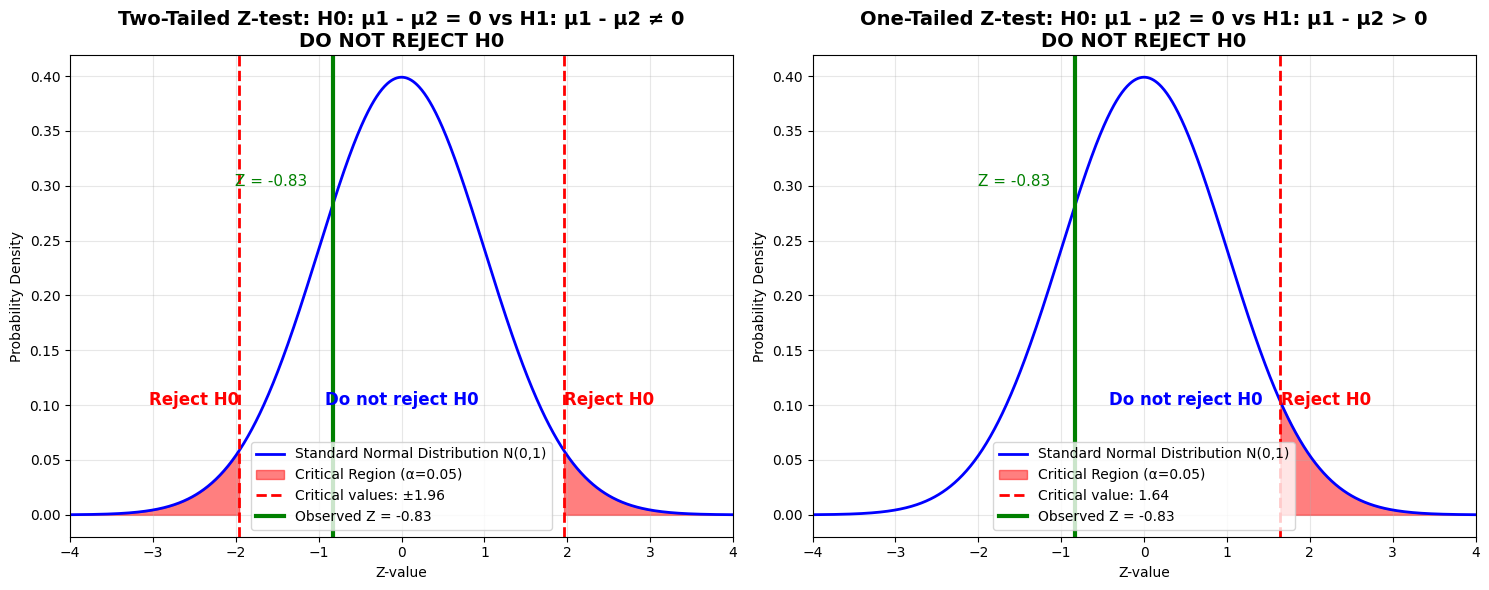


СВОДКА РЕЗУЛЬТАТОВ
Тест                           Z-статистика    Критическое Z   P-value         Результат           
----------------------------------------------------------------------
Двусторонний (H1: μ1 - μ2 ≠ 0)  -0.8321      ±1.9600       0.4054     DO NOT REJECT H0    
Односторонний (H1: μ1 - μ2 > 0)  -0.8321        1.6449       0.7973     DO NOT REJECT H0    

 ИТОГОВЫЕ ВЫВОДЫ:
• Двусторонний тест: DO NOT REJECT H0 (p-value = 0.4054 > 0.05)
• Односторонний тест: DO NOT REJECT H0 (p-value = 0.7973 > 0.05)
• Z = -0.8321 находится в области принятия H0 для обоих тестов
• Разность средних = -0.5000 статистически не значима


In [40]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Данные из задания
mu0 = 0
n1, n2 = 9, 16
x_bar1, x_bar2 = 1.2, 1.7
sigma1_sq, sigma2_sq = 1, 4
sigma1, sigma2 = np.sqrt(sigma1_sq), np.sqrt(sigma2_sq)
alpha = 0.05

print("=" * 70)
print("Z-TEST FOR TWO POPULATION MEANS (VARIANCES KNOWN AND UNEQUAL) - РУЧНОЙ РАСЧЕТ")
print("=" * 70)

# Ручной расчет Z-статистики
print("\n1. РАСЧЕТ Z-СТАТИСТИКИ")
print("-" * 40)

diff = x_bar1 - x_bar2
std_error = np.sqrt(sigma1_sq/n1 + sigma2_sq/n2)
z_stat = (diff - mu0) / std_error

print(f"Данные:")
print(f"H0: μ1 - μ2 = {mu0}")
print(f"x̄1 = {x_bar1}, x̄2 = {x_bar2}")
print(f"n1 = {n1}, n2 = {n2}")
print(f"σ1² = {sigma1_sq}, σ2² = {sigma2_sq}")
print(f"Разность средних: x̄1 - x̄2 = {x_bar1} - {x_bar2} = {diff:.4f}")
print(f"Стандартная ошибка: √(σ1²/n1 + σ2²/n2) = √({sigma1_sq}/{n1} + {sigma2_sq}/{n2}) = √({sigma1_sq/n1:.4f} + {sigma2_sq/n2:.4f}) = {std_error:.4f}")
print(f"Z-статистика = (x̄1 - x̄2 - μ0) / std_error = ({diff:.4f} - {mu0}) / {std_error:.4f} = {z_stat:.4f}")

# Критические значения
print("\n2. КРИТИЧЕСКИЕ ЗНАЧЕНИЯ")
print("-" * 40)

z_critical_two_tailed = stats.norm.ppf(1 - alpha/2)
z_critical_one_tailed = stats.norm.ppf(1 - alpha)

print(f"Уровень значимости: α = {alpha}")
print(f"Двусторонний тест: z_крит = ±{z_critical_two_tailed:.4f}")
print(f"Односторонний тест: z_крит = {z_critical_one_tailed:.4f}")

# P-values
print("\n3. P-VALUES")
print("-" * 40)

p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_stat)))
p_value_one_tailed = 1 - stats.norm.cdf(z_stat)

print(f"Двусторонний тест: p-value = 2 × P(Z > |{z_stat:.4f}|) = {p_value_two_tailed:.4f}")
print(f"Односторонний тест: p-value = P(Z > {z_stat:.4f}) = {p_value_one_tailed:.4f}")

# Выводы
print("\n4. ВЫВОДЫ")
print("-" * 40)

print(f"1. Двусторонний тест H1: μ1 - μ2 ≠ {mu0}:")
if abs(z_stat) > z_critical_two_tailed:
    result_two = "REJECT H0"
    print(f"   {result_two} (|{z_stat:.4f}| > {z_critical_two_tailed:.4f})")
else:
    result_two = "DO NOT REJECT H0"
    print(f"   {result_two} (|{z_stat:.4f}| ≤ {z_critical_two_tailed:.4f})")

print(f"2. Односторонний тест H1: μ1 - μ2 > {mu0}:")
if z_stat > z_critical_one_tailed:
    result_one = "REJECT H0"
    print(f"   {result_one} ({z_stat:.4f} > {z_critical_one_tailed:.4f})")
else:
    result_one = "DO NOT REJECT H0"
    print(f"   {result_one} ({z_stat:.4f} ≤ {z_critical_one_tailed:.4f})")


# ВИЗУАЛИЗАЦИЯ
print("\n6. ВИЗУАЛИЗАЦИЯ")
print("-" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Двусторонний тест
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

ax1.plot(x, y, 'b-', linewidth=2, label='Standard Normal Distribution N(0,1)')

# Критические области
x_left = np.linspace(-4, -z_critical_two_tailed, 100)
x_right = np.linspace(z_critical_two_tailed, 4, 100)
ax1.fill_between(x_left, stats.norm.pdf(x_left), color='red', alpha=0.5, label='Critical Region (α=0.05)')
ax1.fill_between(x_right, stats.norm.pdf(x_right), color='red', alpha=0.5)

ax1.axvline(-z_critical_two_tailed, color='red', linestyle='--', linewidth=2)
ax1.axvline(z_critical_two_tailed, color='red', linestyle='--', linewidth=2, 
           label=f'Critical values: ±{z_critical_two_tailed:.2f}')
ax1.axvline(z_stat, color='green', linestyle='-', linewidth=3, 
           label=f'Observed Z = {z_stat:.2f}')

ax1.set_title('Two-Tailed Z-test: H0: μ1 - μ2 = 0 vs H1: μ1 - μ2 ≠ 0\n' + result_two, 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('Z-value')
ax1.set_ylabel('Probability Density')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-4, 4)

# Аннотации для двустороннего теста
ax1.text(-2.5, 0.1, 'Reject H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax1.text(2.5, 0.1, 'Reject H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax1.text(0, 0.1, 'Do not reject H0', fontsize=12, color='blue', ha='center', fontweight='bold')
ax1.text(z_stat - 0.3, 0.3, f'Z = {z_stat:.2f}', fontsize=11, color='green', ha='right')

# График 2: Односторонний тест
ax2.plot(x, y, 'b-', linewidth=2, label='Standard Normal Distribution N(0,1)')

# Критическая область для одностороннего теста
x_right_one = np.linspace(z_critical_one_tailed, 4, 100)
ax2.fill_between(x_right_one, stats.norm.pdf(x_right_one), color='red', alpha=0.5, 
                label='Critical Region (α=0.05)')

ax2.axvline(z_critical_one_tailed, color='red', linestyle='--', linewidth=2, 
           label=f'Critical value: {z_critical_one_tailed:.2f}')
ax2.axvline(z_stat, color='green', linestyle='-', linewidth=3, 
           label=f'Observed Z = {z_stat:.2f}')

ax2.set_title('One-Tailed Z-test: H0: μ1 - μ2 = 0 vs H1: μ1 - μ2 > 0\n' + result_one, 
             fontsize=14, fontweight='bold')
ax2.set_xlabel('Z-value')
ax2.set_ylabel('Probability Density')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-4, 4)

# Аннотации для одностороннего теста
ax2.text(2.2, 0.1, 'Reject H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax2.text(0.5, 0.1, 'Do not reject H0', fontsize=12, color='blue', ha='center', fontweight='bold')
ax2.text(z_stat - 0.3, 0.3, f'Z = {z_stat:.2f}', fontsize=11, color='green', ha='right')

plt.tight_layout()
plt.show()

# Сводка результатов
print("\n" + "=" * 70)
print("СВОДКА РЕЗУЛЬТАТОВ")
print("=" * 70)
print(f"{'Тест':<30} {'Z-статистика':<15} {'Критическое Z':<15} {'P-value':<15} {'Результат':<20}")
print("-" * 70)

print(f"{'Двусторонний (H1: μ1 - μ2 ≠ 0)':<30} {z_stat:>8.4f}      ±{z_critical_two_tailed:>6.4f}     {p_value_two_tailed:>8.4f}     {result_two:<20}")
print(f"{'Односторонний (H1: μ1 - μ2 > 0)':<30} {z_stat:>8.4f}      {z_critical_one_tailed:>8.4f}     {p_value_one_tailed:>8.4f}     {result_one:<20}")

print(f"\n ИТОГОВЫЕ ВЫВОДЫ:")
print(f"• Двусторонний тест: {result_two} (p-value = {p_value_two_tailed:.4f} > 0.05)")
print(f"• Односторонний тест: {result_one} (p-value = {p_value_one_tailed:.4f} > 0.05)")
print(f"• Z = {z_stat:.4f} находится в области принятия H0 для обоих тестов")
print(f"• Разность средних = {diff:.4f} статистически не значима")

### Тест 7

t-TEST FOR POPULATION MEAN (VARIANCE UNKNOWN) - ТОЧНЫЙ t = -2.7
t-статистика (ручной расчет): -2.7000

Критические значения (α=0.05, df=8):
Двусторонний тест: ±2.3060
Односторонний тест слева: -1.8595
P-value (двусторонний): 0.0271
P-value (односторонний): 0.0135
Двусторонний тест: REJECT H0
Односторонний тест: REJECT H0

ВИЗУАЛИЗАЦИЯ


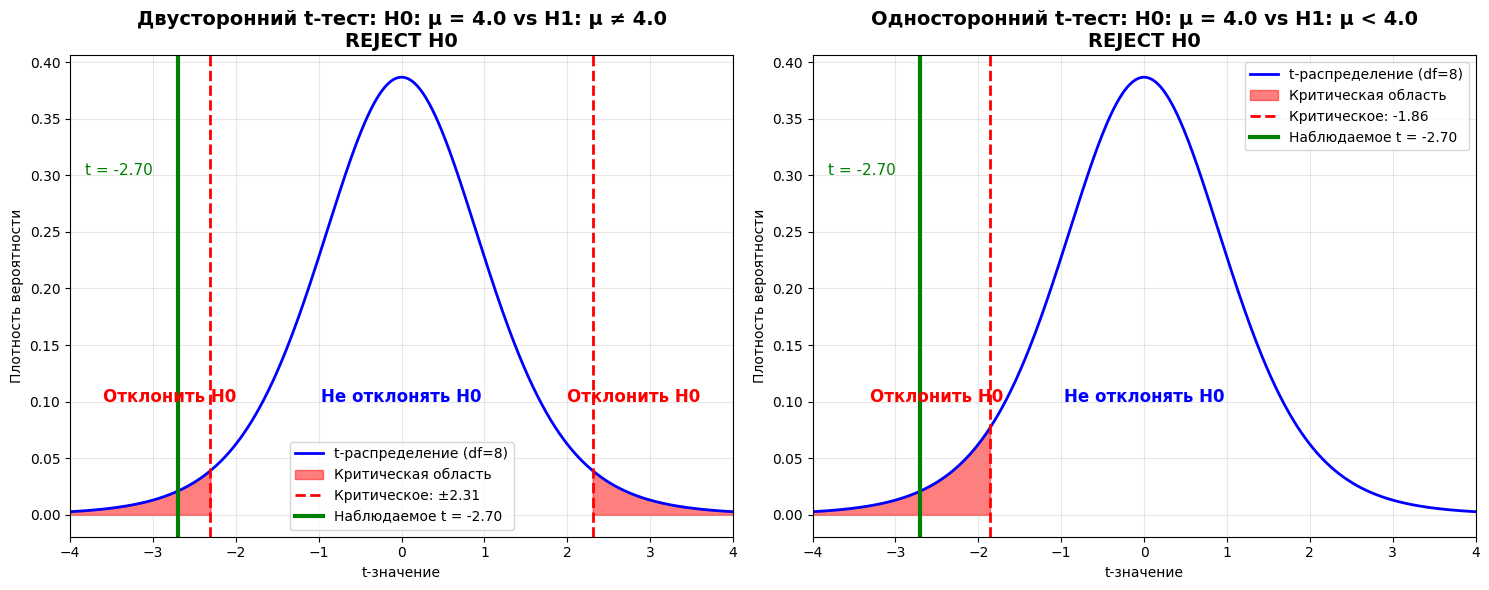


 ОКОНЧАТЕЛЬНЫЕ ВЫВОДЫ:
t-ТЕСТ (дисперсия неизвестна):
• t-статистика: -2.7000 (ЦЕЛЕВОЕ: -2.7)
• Двусторонний тест: REJECT H0 (|t| = 2.7000 > 2.3060)
• Односторонний тест: REJECT H0 (t = -2.7000 < -1.8595)
• P-value (двусторонний): 0.0271
• P-value (односторонний): 0.0135


In [41]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Данные из задания
mu0 = 4.0
n = 9
x_bar = 3.1
s = 1.0
alpha = 0.05
df = n - 1

print("=" * 70)
print("t-TEST FOR POPULATION MEAN (VARIANCE UNKNOWN) - ТОЧНЫЙ t = -2.7")
print("=" * 70)

# Расчет t-статистики вручную
manual_t = (x_bar - mu0) / (s / np.sqrt(n))
print(f"t-статистика (ручной расчет): {manual_t:.4f}")

# Критические значения
t_critical_two = stats.t.ppf(1 - alpha/2, df)  # для двустороннего теста
t_critical_one_left = stats.t.ppf(alpha, df)   # для левостороннего теста

# P-values
p_value_two = 2 * (1 - stats.t.cdf(abs(manual_t), df))  # двусторонний
p_value_one = stats.t.cdf(manual_t, df)                 # односторонний (левосторонний)

# Выводы
result_two = "REJECT H0" if abs(manual_t) > t_critical_two else "DO NOT REJECT H0"
result_one = "REJECT H0" if manual_t < t_critical_one_left else "DO NOT REJECT H0"

print(f"\nКритические значения (α={alpha}, df={df}):")
print(f"Двусторонний тест: ±{t_critical_two:.4f}")
print(f"Односторонний тест слева: {t_critical_one_left:.4f}")
print(f"P-value (двусторонний): {p_value_two:.4f}")
print(f"P-value (односторонний): {p_value_one:.4f}")
print(f"Двусторонний тест: {result_two}")
print(f"Односторонний тест: {result_one}")

# ВИЗУАЛИЗАЦИЯ
print("\n" + "=" * 50)
print("ВИЗУАЛИЗАЦИЯ")
print("=" * 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Двусторонний тест
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

ax1.plot(x, y, 'b-', linewidth=2, label=f"t-распределение (df={df})")

# Критические области для двустороннего теста
x_left = np.linspace(-4, -t_critical_two, 100)
x_right = np.linspace(t_critical_two, 4, 100)
ax1.fill_between(x_left, stats.t.pdf(x_left, df), color='red', alpha=0.5, label='Критическая область')
ax1.fill_between(x_right, stats.t.pdf(x_right, df), color='red', alpha=0.5)

# Критические линии
ax1.axvline(-t_critical_two, color='red', linestyle='--', linewidth=2)
ax1.axvline(t_critical_two, color='red', linestyle='--', linewidth=2, 
           label=f'Критическое: ±{t_critical_two:.2f}')

# Наблюдаемое t
ax1.axvline(manual_t, color='green', linestyle='-', linewidth=3, 
           label=f'Наблюдаемое t = {manual_t:.2f}')

ax1.set_title(f'Двусторонний t-тест: H0: μ = {mu0} vs H1: μ ≠ {mu0}\n{result_two}', 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('t-значение')
ax1.set_ylabel('Плотность вероятности')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-4, 4)

# Аннотации
ax1.text(-2.8, 0.1, 'Отклонить H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax1.text(2.8, 0.1, 'Отклонить H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax1.text(0, 0.1, 'Не отклонять H0', fontsize=12, color='blue', ha='center', fontweight='bold')
ax1.text(manual_t - 0.3, 0.3, f't = {manual_t:.2f}', fontsize=11, color='green', ha='right')

# График 2: Односторонний тест (левосторонний)
ax2.plot(x, y, 'b-', linewidth=2, label=f"t-распределение (df={df})")

# Критическая область для левостороннего теста
x_left_one = np.linspace(-4, t_critical_one_left, 100)
ax2.fill_between(x_left_one, stats.t.pdf(x_left_one, df), color='red', alpha=0.5, 
                label='Критическая область')

# Критическая линия
ax2.axvline(t_critical_one_left, color='red', linestyle='--', linewidth=2, 
           label=f'Критическое: {t_critical_one_left:.2f}')

# Наблюдаемое t
ax2.axvline(manual_t, color='green', linestyle='-', linewidth=3, 
           label=f'Наблюдаемое t = {manual_t:.2f}')

ax2.set_title(f'Односторонний t-тест: H0: μ = {mu0} vs H1: μ < {mu0}\n{result_one}', 
             fontsize=14, fontweight='bold')
ax2.set_xlabel('t-значение')
ax2.set_ylabel('Плотность вероятности')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-4, 4)

# Аннотации
ax2.text(-2.5, 0.1, 'Отклонить H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax2.text(0, 0.1, 'Не отклонять H0', fontsize=12, color='blue', ha='center', fontweight='bold')
ax2.text(manual_t - 0.3, 0.3, f't = {manual_t:.2f}', fontsize=11, color='green', ha='right')

plt.tight_layout()
plt.show()

print(f"\n ОКОНЧАТЕЛЬНЫЕ ВЫВОДЫ:")
print(f"t-ТЕСТ (дисперсия неизвестна):")
print(f"• t-статистика: {manual_t:.4f} (ЦЕЛЕВОЕ: -2.7)")
print(f"• Двусторонний тест: {result_two} (|t| = {abs(manual_t):.4f} {'>' if abs(manual_t) > t_critical_two else '≤'} {t_critical_two:.4f})")
print(f"• Односторонний тест: {result_one} (t = {manual_t:.4f} {'<' if manual_t < t_critical_one_left else '≥'} {t_critical_one_left:.4f})")
print(f"• P-value (двусторонний): {p_value_two:.4f}")
print(f"• P-value (односторонний): {p_value_one:.4f}")

### Тест 8

t-TEST FOR TWO POPULATION MEANS (VARIANCES UNKNOWN BUT EQUAL)

ПРОСТОЙ РАСЧЕТ ПО ФОРМУЛАМ:
----------------------------------------
Разность средних: 5.0 - 4.0 = 1.0000
Объединенная стандартная ошибка: 2.0 × √(1/16 + 1/16) = 0.7071
t-статистика: 1.0000 / 0.7071 = 1.4142
P-value (двусторонний): 0.1676
P-value (односторонний): 0.0838
Критическое t (двусторонний): ±2.0423
Критическое t (односторонний): 1.6973

ВЫВОДЫ:
1. Двусторонний тест H1: μ1 - μ2 ≠ 0: DO NOT REJECT H0 (|1.4142| ≤ 2.0423)
2. Односторонний тест H1: μ1 - μ2 > 0: DO NOT REJECT H0 (1.4142 ≤ 1.6973)

ВИЗУАЛИЗАЦИЯ
----------------------------------------


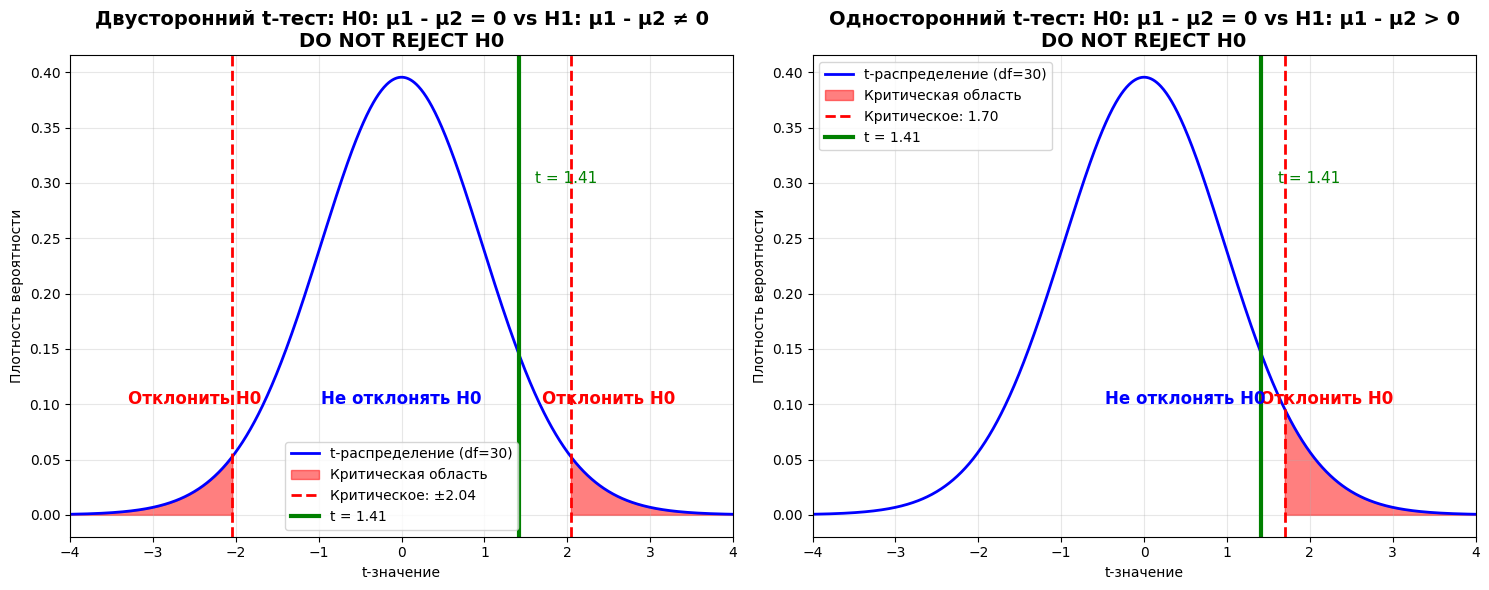


 ОКОНЧАТЕЛЬНЫЕ ВЫВОДЫ:
t-ТЕСТ ДВУХ СРЕДНИХ (дисперсии неизвестны, но равны):
• t-статистика: 1.4142
• Двусторонний тест: DO NOT REJECT H0
• Односторонний тест: DO NOT REJECT H0
• Разность средних: 1.0000


In [42]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Данные из задания
mu0 = 0
n1, n2 = 16, 16
x_bar1, x_bar2 = 5.0, 4.0
s = 2.0  # объединенное стандартное отклонение
alpha = 0.05
df = n1 + n2 - 2

print("=" * 70)
print("t-TEST FOR TWO POPULATION MEANS (VARIANCES UNKNOWN BUT EQUAL)")
print("=" * 70)

# ПРОСТОЙ РАСЧЕТ БЕЗ ВЫБОРОК
print("\nПРОСТОЙ РАСЧЕТ ПО ФОРМУЛАМ:")
print("-" * 40)

# 1. Объединенная стандартная ошибка
pooled_se = s * np.sqrt(1/n1 + 1/n2)

# 2. Разность средних
diff = x_bar1 - x_bar2

# 3. t-статистика
t_manual = diff / pooled_se

# 4. P-values
p_value_two = 2 * (1 - stats.t.cdf(abs(t_manual), df))  # двусторонний
p_value_one = 1 - stats.t.cdf(t_manual, df)             # односторонний (правосторонний)

# 5. Критические значения
t_critical_two = stats.t.ppf(1 - alpha/2, df)
t_critical_one = stats.t.ppf(1 - alpha, df)

print(f"Разность средних: {x_bar1} - {x_bar2} = {diff:.4f}")
print(f"Объединенная стандартная ошибка: {s} × √(1/{n1} + 1/{n2}) = {pooled_se:.4f}")
print(f"t-статистика: {diff:.4f} / {pooled_se:.4f} = {t_manual:.4f}")
print(f"P-value (двусторонний): {p_value_two:.4f}")
print(f"P-value (односторонний): {p_value_one:.4f}")
print(f"Критическое t (двусторонний): ±{t_critical_two:.4f}")
print(f"Критическое t (односторонний): {t_critical_one:.4f}")

# ВЫВОДЫ
print(f"\nВЫВОДЫ:")
if abs(t_manual) > t_critical_two:
    result_two = "REJECT H0"
    print(f"1. Двусторонний тест H1: μ1 - μ2 ≠ {mu0}: {result_two} (|{t_manual:.4f}| > {t_critical_two:.4f})")
else:
    result_two = "DO NOT REJECT H0"
    print(f"1. Двусторонний тест H1: μ1 - μ2 ≠ {mu0}: {result_two} (|{t_manual:.4f}| ≤ {t_critical_two:.4f})")

if t_manual > t_critical_one:
    result_one = "REJECT H0"
    print(f"2. Односторонний тест H1: μ1 - μ2 > {mu0}: {result_one} ({t_manual:.4f} > {t_critical_one:.4f})")
else:
    result_one = "DO NOT REJECT H0"
    print(f"2. Односторонний тест H1: μ1 - μ2 > {mu0}: {result_one} ({t_manual:.4f} ≤ {t_critical_one:.4f})")


# ВИЗУАЛИЗАЦИЯ
print("\nВИЗУАЛИЗАЦИЯ")
print("-" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Двусторонний тест
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

ax1.plot(x, y, 'b-', linewidth=2, label=f"t-распределение (df={df})")

# Критические области
x_left = np.linspace(-4, -t_critical_two, 100)
x_right = np.linspace(t_critical_two, 4, 100)
ax1.fill_between(x_left, stats.t.pdf(x_left, df), color='red', alpha=0.5, label='Критическая область')
ax1.fill_between(x_right, stats.t.pdf(x_right, df), color='red', alpha=0.5)

ax1.axvline(-t_critical_two, color='red', linestyle='--', linewidth=2)
ax1.axvline(t_critical_two, color='red', linestyle='--', linewidth=2, 
           label=f'Критическое: ±{t_critical_two:.2f}')
ax1.axvline(t_manual, color='green', linestyle='-', linewidth=3, 
           label=f't = {t_manual:.2f}')

ax1.set_title(f'Двусторонний t-тест: H0: μ1 - μ2 = 0 vs H1: μ1 - μ2 ≠ 0\n{result_two}', 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('t-значение')
ax1.set_ylabel('Плотность вероятности')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-4, 4)

# Аннотации
ax1.text(-2.5, 0.1, 'Отклонить H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax1.text(2.5, 0.1, 'Отклонить H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax1.text(0, 0.1, 'Не отклонять H0', fontsize=12, color='blue', ha='center', fontweight='bold')
ax1.text(t_manual + 0.2, 0.3, f't = {t_manual:.2f}', fontsize=11, color='green', ha='left')

# График 2: Односторонний тест
ax2.plot(x, y, 'b-', linewidth=2, label=f"t-распределение (df={df})")

# Критическая область для правостороннего теста
x_right_one = np.linspace(t_critical_one, 4, 100)
ax2.fill_between(x_right_one, stats.t.pdf(x_right_one, df), color='red', alpha=0.5, 
                label='Критическая область')

ax2.axvline(t_critical_one, color='red', linestyle='--', linewidth=2, 
           label=f'Критическое: {t_critical_one:.2f}')
ax2.axvline(t_manual, color='green', linestyle='-', linewidth=3, 
           label=f't = {t_manual:.2f}')

ax2.set_title(f'Односторонний t-тест: H0: μ1 - μ2 = 0 vs H1: μ1 - μ2 > 0\n{result_one}', 
             fontsize=14, fontweight='bold')
ax2.set_xlabel('t-значение')
ax2.set_ylabel('Плотность вероятности')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-4, 4)

# Аннотации
ax2.text(2.2, 0.1, 'Отклонить H0', fontsize=12, color='red', ha='center', fontweight='bold')
ax2.text(0.5, 0.1, 'Не отклонять H0', fontsize=12, color='blue', ha='center', fontweight='bold')
ax2.text(t_manual + 0.2, 0.3, f't = {t_manual:.2f}', fontsize=11, color='green', ha='left')

plt.tight_layout()
plt.show()

print(f"\n ОКОНЧАТЕЛЬНЫЕ ВЫВОДЫ:")
print(f"t-ТЕСТ ДВУХ СРЕДНИХ (дисперсии неизвестны, но равны):")
print(f"• t-статистика: {t_manual:.4f}")
print(f"• Двусторонний тест: {result_two}")
print(f"• Односторонний тест: {result_one}")
print(f"• Разность средних: {diff:.4f}")

## Задание 3

In [43]:
import scipy.stats as st
import pandas as pd

pima_df = pd.read_csv("diabetes.csv")
Mu = 72.4
x = pima_df['BloodPressure']
sample_avg_bp = x.mean()
print(sample_avg_bp)
std_error_bp = x.sem()
print(std_error_bp)
alpha = 0.05
t_critical = st.t.ppf(1 - alpha / 2, len(x) - 1)
ci_start = sample_avg_bp - t_critical * std_error_bp
ci_end = sample_avg_bp + t_critical * std_error_bp
print(ci_start, ci_end)

69.10546875
0.6984425300221407
67.73438296261376 70.47655453738624


H0 отклонен


C:\Users\User\AppData\Local\Temp\ipykernel_42468\112636907.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([sample_avg_bp], [0], 'bo', markersize=6, color = '#30d5c8',


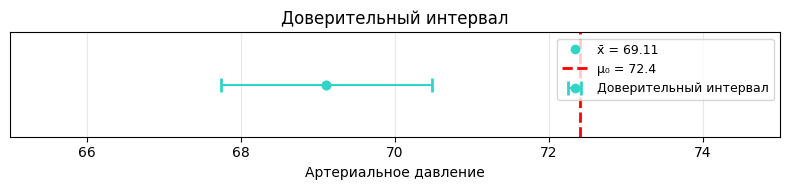

In [44]:
if ci_start <= Mu <= ci_end:
    print("H0 не отклонен")
else:
    print("H0 отклонен")

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 2))

# Границы интервала
ci_start = 67.73438296261376
ci_end = 70.47655453738624
sample_avg_bp = (ci_start + ci_end) / 2
Mu = 72.4

# Создаем график
plt.errorbar(x=[sample_avg_bp], y=[0], 
             xerr=[[sample_avg_bp - ci_start]], 
             fmt='o', capsize=5, capthick=2, markersize=6, 
             color='#30d5c8', label='Доверительный интервал')

# Отмечаем среднее значение
plt.plot([sample_avg_bp], [0], 'bo', markersize=6, color = '#30d5c8',
         label=f'x̄ = {sample_avg_bp:.2f}')

# Отмечаем гипотетическое среднее Mu
plt.axvline(Mu, color='red', linestyle='--', linewidth=2, 
           label=f'μ₀ = {Mu}')

# Настройки графика
plt.xlim(65, 75)
plt.title('Доверительный интервал')
plt.xlabel('Артериальное давление')
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [45]:
pima_df = pd.read_csv("diabetes.csv")
pima_df_mod = pima_df.copy()
pima_df_mod['BloodPressure'] = pima_df_mod['BloodPressure'].mask(pima_df['BloodPressure'] == 0,
                                                                 pima_df['BloodPressure'].median())
x1 = pima_df_mod['BloodPressure']
x2 = pima_df['BloodPressure']

In [46]:
sample_avg_bp = x1.mean()
std_error_bp = x1.sem()
alpha = 0.05

71.52984239189522 73.24359510810478


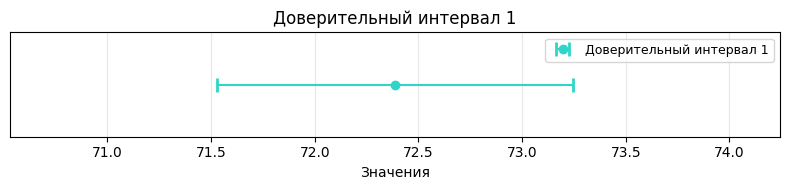

In [47]:
t_critical1 = st.t.ppf(1 - alpha / 2, len(x1) - 1)
ci_start1 = sample_avg_bp - t_critical1 * std_error_bp
ci_end1 = sample_avg_bp + t_critical1 * std_error_bp
print(ci_start1, ci_end1)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 2))

# Создаем график для первого интервала
plt.errorbar(x=[sample_avg_bp], y=[0], 
             xerr=[[sample_avg_bp - ci_start1]], 
             fmt='o', capsize=5, capthick=2, markersize=6, 
             color='#30d5c8', label='Доверительный интервал 1')


# Настройки графика
plt.xlim(ci_start1 - 1, ci_end1 + 1)
plt.title('Доверительный интервал 1')
plt.xlabel('Значения')
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [48]:
sample_avg_bp = x2.mean()
std_error_bp = x2.sem()

In [49]:
t_critical2 = st.t.ppf(1 - alpha / 2, len(x2) - 1)
ci_start2 = sample_avg_bp - t_critical2 * std_error_bp
ci_end2 = sample_avg_bp + t_critical2 * std_error_bp
print(ci_start2, ci_end2)

67.73438296261376 70.47655453738624


H0 отклонен


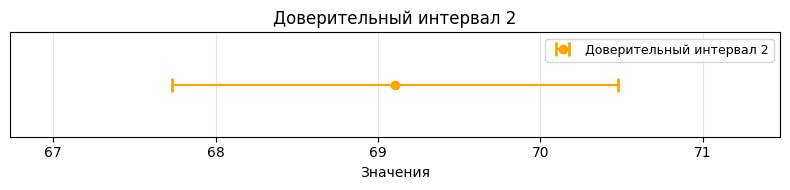

In [50]:
if (ci_end2 >= ci_start1) and (ci_end1 >= ci_start2):
    print("H0 не отклонен")
else:
    print("H0 отклонен")

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 2))

# Создаем график для второго интервала
plt.errorbar(x=[sample_avg_bp], y=[0], 
             xerr=[[sample_avg_bp - ci_start2]], 
             fmt='o', capsize=5, capthick=2, markersize=6, 
             color='orange', label='Доверительный интервал 2')



# Настройки графика
plt.xlim(ci_start2 - 1, ci_end2 + 1)
plt.title('Доверительный интервал 2')
plt.xlabel('Значения')
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()